# Find the GT Board in a Video Image
- Testing on Botez Video

In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from glob import glob
import sys

sys.path.append("../src/")
from detect_gt import add_edges

In [2]:
%matplotlib inline

In [3]:
%load_ext lab_black
plt.style.use("ggplot")

# Use Video Extractor

In [4]:
from label_extract import VideoBoardExtractor

In [5]:
vbe = VideoBoardExtractor(
    video_fn="../data/Botez/mnxJQaxybWQ.mp4",
    at_first_gt_frame=True,
    predict_fen=True,
    store_gt_boards=True,
    store_irl_boards=True,
    store_irl_video=True,
    save_img_freq=1200,
    gt_board_loc=[5, 290, 5, 290],
    irl_board_loc=[420, 720, 350, 930],
)

	 Loading model '../tensorflow_chessbot/saved_models/frozen_graph.pb'
	 Model restored.


In [6]:
vbe.load_videocap()

In [7]:
vbe.process_video(start_frame=2000, stop_frame=2500)

<VideoCapture 0x7f7004db09b0>


100%|█████████▉| 2499/2500 [00:18<00:00, 132.25it/s]


(-0.5, 1279.5, 719.5, -0.5)

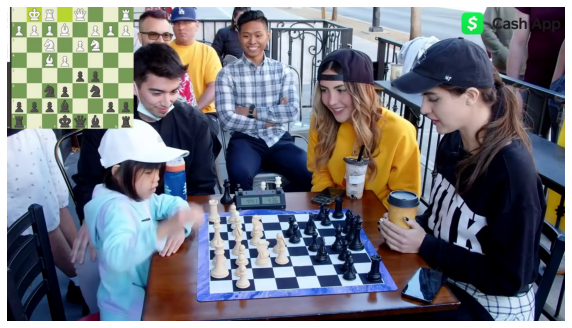

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vbe.this_frame_img, cv2.COLOR_BGR2RGB))
ax.axis("off")

(-0.5, 284.5, 284.5, -0.5)

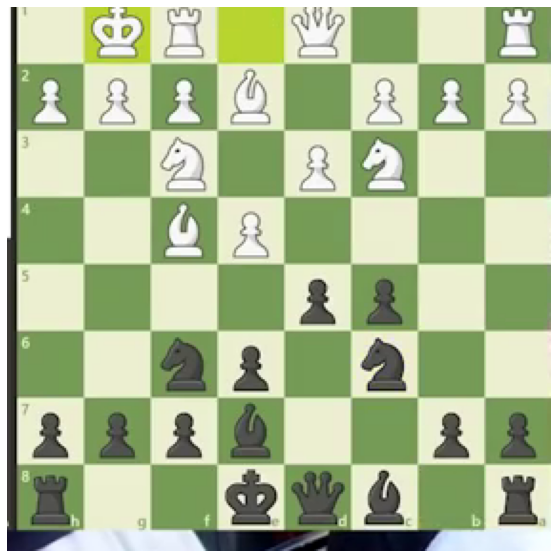

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vbe.gt_board, cv2.COLOR_BGR2RGB))
ax.axis("off")

In [25]:
import chess

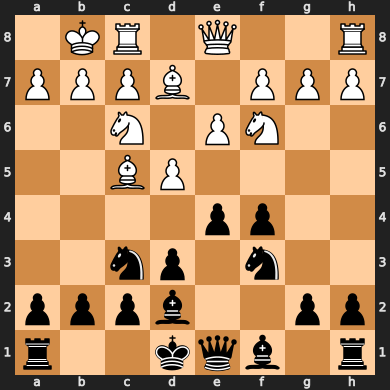

In [26]:
chess.Board(vbe.fens[2500])

'1KR1Q2R/PPPB1PPP/2N1PN2/2BP4/4pp2/2np1n2/pppb2pp/r2kqb1r'

In [11]:
vbe.irl_board.shape

(299, 580, 3)

In [12]:
irl_board_loc = [420, -1, 350, -350]
irl_height = int(irl_board_loc[1] - irl_board_loc[0])
irl_width = int(irl_board_loc[3] - irl_board_loc[2])

In [13]:
irl_height, irl_width

(-421, -700)

In [8]:
import chess

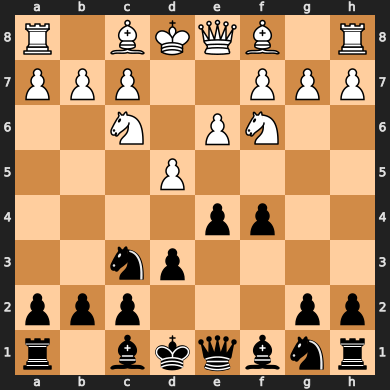

In [10]:
chess.Board(vbe.fens[2000])

(-0.5, 284.5, 284.5, -0.5)

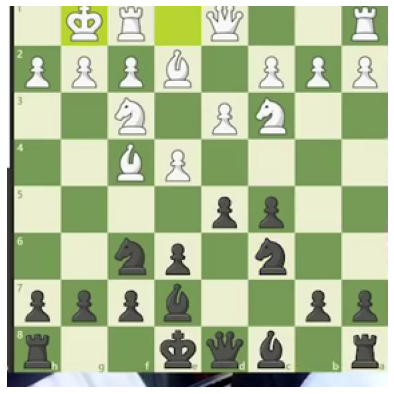

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(vbe.gt_board)
ax.axis("off")

(-0.5, 579.5, 298.5, -0.5)

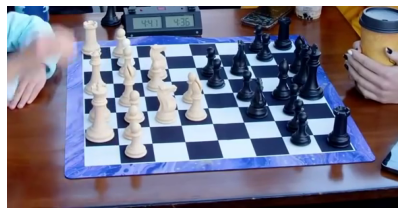

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(vbe.irl_board)
ax.axis("off")

In [15]:
vbe.irl_board.shape

(299, 580, 3)

In [17]:
vbe.this_frame_img.shape

(720, 1280, 3)

In [24]:
irl_board_loc = [420, 720, 350, 1280]

irl_height = irl_board_loc[1] - irl_board_loc[0]
irl_width = irl_board_loc[3] - irl_board_loc[2]

In [26]:
irl_width

930

In [14]:
vbe.irl_board

array([[[  1,   7,  26],
        [  0,   0,  18],
        [  0,   0,   7],
        ...,
        [181, 132,  44],
        [183, 131,  42],
        [183, 131,  42]],

       [[  0,   4,  23],
        [  0,   1,  20],
        [  0,   0,  11],
        ...,
        [182, 133,  45],
        [185, 133,  44],
        [185, 133,  44]],

       [[  0,   2,  21],
        [  0,   2,  21],
        [  0,   0,  20],
        ...,
        [160, 127,  75],
        [165, 128,  57],
        [168, 131,  60]],

       ...,

       [[109,  66,  51],
        [109,  66,  51],
        [111,  63,  47],
        ...,
        [  1,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[110,  67,  52],
        [109,  66,  51],
        [111,  63,  47],
        ...,
        [  1,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[110,  67,  52],
        [109,  66,  51],
        [111,  63,  47],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

# Pull the IRL Board

In [8]:
example_img = cv2.imread("../data/processed/nxJQaxybWQ/imgs/1200.png")

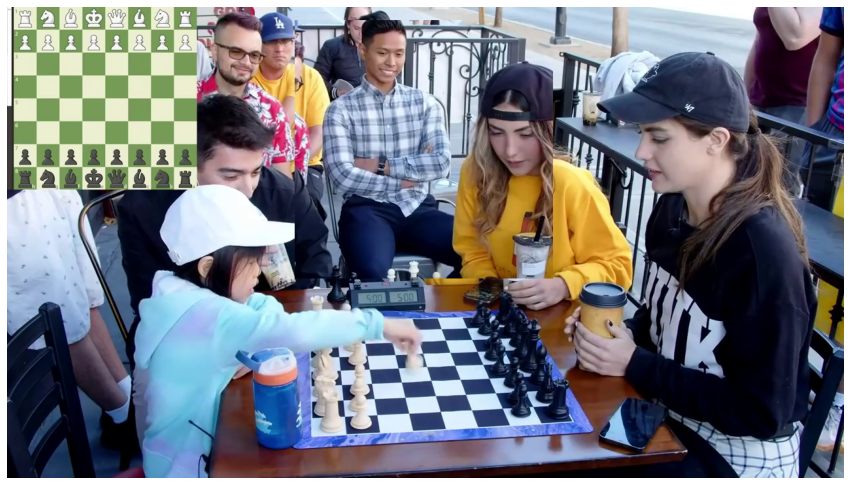

In [12]:
example_img_ = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(example_img_)
ax.axis("off")
plt.show()

# Harris Corner Detection
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

In [13]:
from sklearn.preprocessing import MinMaxScaler

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1279.5, 719.5, -0.5)

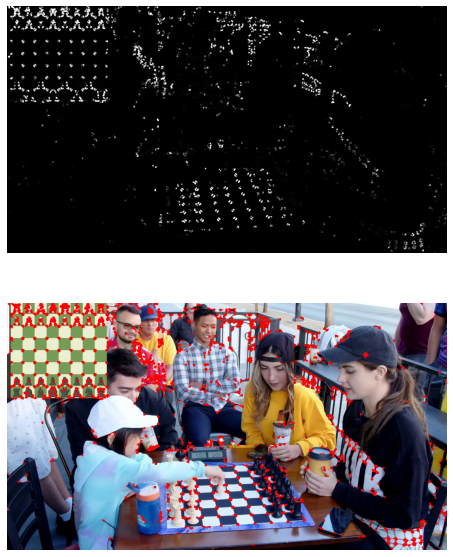

In [17]:
thres = 0.01
# img = cv2.imread(imgs[0])
img = example_img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > thres * dst.max()] = [0, 0, 255]

dst_norm = dst / (dst.max() / 5)

# mm = MinMaxScaler()
# dst_norm = mm.fit_transform(dst) * 255

plt_img1 = cv2.cvtColor(dst_norm, cv2.COLOR_BGR2RGB)
plt_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].imshow(plt_img1)
axs[1].imshow(plt_img2)

axs[0].axis("off")
axs[1].axis("off")